# April 2022 Questions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 04/18 Question

Given the following data set, can you plot a chart that shows the percent of revenue by marketing source?

You can assume that purchase_value is revenue in this case, and you'll have to calculate the percent of revenue by source prior to plotting.

### Approach

To solve this problem, I will first group the provided data by source type and sum by the purchase_value column. Then I will find total revenue by summing the purchase_value column.

Next, I will divide the grouped purchase_value column by total revenue and multiply by 100 to find a percent of total revenue.

Finally, I will use seaborn to plot revenue perentage by source.

### Solution

In [17]:
# import data
data_2022_04_18 = pd.read_csv("./Data/2022.04.18_data.csv")

In [18]:
# look at data structure
data_2022_04_18.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 2:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 1:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 7:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [19]:
# calc total revenue
total_revenue = sum(data_2022_04_18['purchase_value'])

2255830

In [79]:
# group data by source, aggregate the revenue column
data_2022_04_18_grouped = data_2022_04_18.groupby('source').agg({'purchase_value':['sum']})

,purchase_value
,sum
source,
Ads,889934
Direct,459174
SEO,906722


In [80]:
# re-calc purchase_value column so it represents a % value, and reset index
data_2022_04_18_grouped['purchase_value'] = 100*data_2022_04_18_grouped['purchase_value']/total_revenue
data_2022_04_18_grouped.reset_index(inplace=True)

,source,purchase_value
,,sum
0,Ads,39.450402
1,Direct,20.354991
2,SEO,40.194607


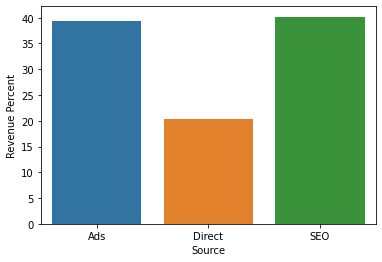

In [95]:
# plot data using seaborn
ax=(sns.barplot(data=data_2022_04_18_grouped,x='source',y=data_2022_04_18_grouped['purchase_value']['sum']))
ax.set(xlabel='Source', ylabel='Revenue Percent')
plt.show()

## 04/15 Question

Suppose you're trying to measure the Selenium toxicity in your tap water, and obtain the following values for each day:


    
    
|day|	selenium|
|---|---|
|1	|0.051|
|2	|0.0505|
|3	|0.049|
|4	|0.0516|
|5	|0.052|
|6	|0.0508|
|7	|0.0506|

    
The maxiumum level for safe drinking water is 0.05 mg/L -- using this as your alpha, does the selenium tap level exceed the legal limit?

### Approach

To solve this problem, I will conduct a one sided t test. My null hypothesis will be that the average of the provided data is greater or equal to the 0.05 legal limit, and the alternative hypothesis is that the data's average is less than the legal limit value.

I will use a significance level of 0.05, and conduct the t test with the scipy package. If the resulting p value is less than 0.05, we can reject the null hypothesis and conclude that the data average is less than the legal limit. Otherwise, we will conclude that the selenium content in this water is above the legal limit.

### Solution

In [2]:
import scipy.stats as stats

data = [.051, .0505, .049, .0516, .052, .0508, .0506]

stats.ttest_1samp(a=data, popmean=0.05, alternative='less')


Ttest_1sampResult(statistic=2.173499949434694, pvalue=0.9636449406601787)

As seen above, the p value for our test is 0.96, far higher than the 0.05 threshold set. This indicates that the selenium tap level has exceeded the legal limit.

## 04/13 Question

Suppose we are given an array of n integers which represent the value of some stock over time. Assuming you are allowed to buy the stock exactly once and sell the stock once, what is the maximum profit you can make? Can you write an algorithm that takes in an array of values and returns the maximum profit?
    


    
    
 For example, if you are given the following array:


    
    
[2, 7, 1, 8, 2, 8, 14, 25, 14, 0, 4, 5]
    


    

    
 The maximum profit you can make is 24 because you would buy the stock when its price is 1 and sell when it's 25. Note that we cannot make 25, because the stock is priced at 0 after it is priced at 25 (e.g you can't sell before you buy).
 
 ## Approach
 
 To solve this problem, I will first initiate a max_profit variable to track the highest profit calculated thus far.
 
I will then loop through each number in the provided array. For each of these loops, I will compare the first number to all those afterward and take the difference between them. If the difference, which would be a profit from buying/selling a stock, is higher than the current max profit value then it will be set as the new max profit value.
 
At the end of the function, I will return the max profit variable.

In [1]:
def sell_stock(arr):
    max_profit=0
    for i in range(len(arr)-1):
        current_price=arr[i]
        for future_price in arr[i+1:]:
            if future_price-current_price>max_profit:
                max_profit = future_price-current_price
    return max_profit

## 04/11 Question

Suppose your team interviews undergraduate candidates across many different colleges. You are looking to check which candidates scored the highest from each college.

Given the below tables, write a SQL query (using a window function) to show which candidates scored the highest from each college.

Table: candidateColleges


|college_id	|candidate_name|
|---|---|
|123456	|john_smith|
|123456	|sarah_daniels|
|123457	|tim_cook|
|123457	|lisa_perelli|
|123457	|jenny_west|
|123457	|karl_tran|
|123457	|tammy_turner|

    

    
Table: candidateInterviews

Each row represents a unique interview/candidate as well as the candidate's score (an integer from 1-5, with 5 representing the highest possible score).

|interview_id|	candidate_name|	interview_score|
|---|---|---|
|12|	john_smith|	4|
|22|	sarah_daniels|	3|
|23|	tim_cook|	3|
|25|	lisa_perelli|	5|
|26|	jenny_west|	2|
|27|	karl_tran|	2|
|28|	tammy_turner|	4|


### Approach

To perform the above query, I will:
- join the two tables on candidate_name
- use the rank function to create a new column, ranking scores by college_id using the partition method/syntax
- display the candidate name, college, score and rank ordered by college/score for better college-level comparison

### Solution

SELECT a.candidate_name AS Name,  <br>
       b.college_id as College,<br>
       a.interview_score AS Score, <br>
       RANK () OVER ( PARTITION BY b.college_id ORDER BY a.interview_score DESC) AS Score_Rank_By_College <br>
FROM  candidateInterviews a JOIN  candidateColleges b on a.candidate_name=b.candidate_name <br>
order by College desc, Score Desc

## 04/08 Question

The following dataset contains the following fields that describe employee attrition for a company:
    


        
satisfaction_level: value between 0 - 1 that describes how satisfied the employee was at their current role
 
        
last_evaluation: value between 0 - 1 that describes how well the employee performed
 
        
number_project: number of projects the employee was on
 
        
average_montly_hours: average number of hours worked monthly 

time_spend_company: number of years at the company
 
        
work_accident: boolean for if the employee has been in an accident at work
 
        
left: boolean that describes if the employee has left the company
 
        
role: employee's role

        
salary: low, medium, high --> indicates how high employee salary was

    
    

    
Can you describe which factors are the strongest indicator if an employee is going to attrit?
Hint: If you're having trouble finding a starting point, you can reference this method and this wikipedia page.

### Approach

To solve this problem, I will perform two analyses.

First, I will find the pearson's correlation coefficient between each of the columns and the "left" column. This coefficient should indicate how correlated the given column is to the target column. I will do this by writing a function to loop through each column, find the coefficient, and store that result in a dataframe.

Second, I will train a random forest model on the data. Once the model is fit, I will then determine the permutation importance of each factor which should also provide an indication of which columns were more important when building the model.

### Results

Per the below, in the first approach I found correlation coefficients for each factor with the target. The goal was to find the factors with the highest coefficients. The analysis determined that time_spend_company and salary_low were the highest indicators of employee attrition.

Interestingly, these were the 5th and 6th most important factors in the second analysis though some of the higher ranked factors had strong negative correlations in the first analysis (meaning that they were more strongly associated with an employee staying).

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [91]:
data_2022_04_08 = pd.read_csv("./Data/2022_04_08_data.csv")

In [92]:
data_2022_04_08.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [93]:
data_2022_04_08=pd.get_dummies(data_2022_04_08)

In [94]:
def attrit_factors(df):
    final_df=pd.DataFrame(columns=["factor","coefficient"])
    for column in df.columns:
        if column!="left":
            final_df=final_df.append({"factor": column, "coefficient":df["left"].corr(df[column])}, ignore_index=True)
    print(final_df.sort_values(by="coefficient"))

In [95]:
attrit_factors(data_2022_04_08)

                   factor  coefficient
0      satisfaction_level    -0.388375
5           Work_accident    -0.154622
17            salary_high    -0.120929
19          salary_medium    -0.068833
6   promotion_last_5years    -0.061788
8             sales_RandD    -0.046596
11       sales_management    -0.046035
13      sales_product_mng    -0.011029
7                sales_IT    -0.010925
12        sales_marketing    -0.000859
1         last_evaluation     0.006567
14            sales_sales     0.009923
15          sales_support     0.010700
9        sales_accounting     0.015201
16        sales_technical     0.020076
2          number_project     0.023787
10               sales_hr     0.028249
3    average_montly_hours     0.071287
18             salary_low     0.134722
4      time_spend_company     0.144822


In [96]:
from sklearn.model_selection import train_test_split

#ML model imports
from sklearn.ensemble import RandomForestClassifier

#metric and analysis imports
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from sklearn.inspection import permutation_importance


In [97]:
X=data_2022_04_08.drop('left',axis=1)
y=data_2022_04_08['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [98]:
def run_model(X_test,X_train, y_test,y_train, model):
    model.fit(X_train,y_train)
    y_pred_class = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:,1]
    plot_confusion_matrix(model,X_test,y_test,cmap='coolwarm')
    
    #Accuracy ((# of correct classifactions out of all attempted classifications))
    accuracy=accuracy_score(y_test,y_pred_class)
    
    # Precision (of all observations that were predicted +, how many were actually +)
    precision=precision_score(y_test,y_pred_class)
    
    #Recall (of all + observations, how many did we predict as +)
    recall=recall_score(y_test,y_pred_class)
    
    #f1 score (harmonic mean of recall and precision)
    f1=f1_score(y_test,y_pred_class)
    
    nl='\n'
    return (print(f'Model: {model} {nl}accuracy: {accuracy} {nl}precision: {precision} {nl}recall: {recall} {nl}F1 score: {f1}'))

In [99]:
random_forest_clf = RandomForestClassifier(random_state=42,n_estimators=500)

Model: RandomForestClassifier(n_estimators=500, random_state=42) 
accuracy: 0.99 
precision: 0.9942196531791907 
recall: 0.9635854341736695 
F1 score: 0.9786628733997155


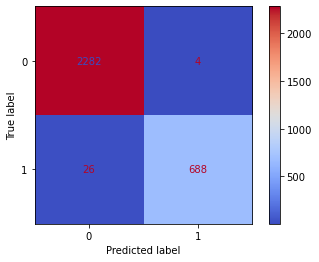

In [100]:
run_model(X_test,X_train, y_test,y_train, random_forest_clf)

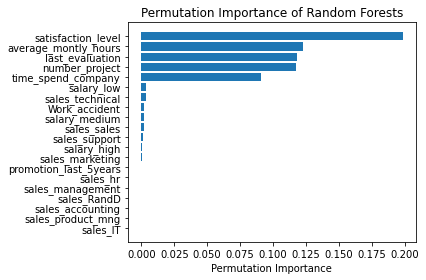

In [102]:
################################################
## Permutation feature importance 
################################################
result = permutation_importance(random_forest_clf,X_test, y_test, n_repeats=10,random_state=42)

permutation_importance=pd.DataFrame(result['importances_mean'])
feature_names=pd.DataFrame(X.columns)
permutation_importance_summary = pd.concat([feature_names,permutation_importance],axis=1)
permutation_importance_summary.columns = ['input_variable','permutation_importance']
permutation_importance_summary.sort_values(by='permutation_importance', inplace=True)

plt.barh(permutation_importance_summary['input_variable'],permutation_importance_summary['permutation_importance'])
plt.title("Permutation Importance of Random Forests")
plt.xlabel("Permutation Importance")
plt.tight_layout()
plt.show()

## 04/04 Question

Given an array of integers, print the array in alternating min/max order. The first element should be the first maximum, second element should be the first minimum, third element should be second maximum, etc.

For example:
    
#Given the following array:
  
arr[] = [10, 2, 11, 3, 7, 4, 1] 

#Your function should return:

11, 1, 10, 2, 7, 3, 4

### Approach

To solve this proble, I will create a function that will do as follows:
- Take in an array
- Initiate an empty res array to store the final result
- Initiate a queue with our input array
- Use a while loop to go through the sorted data
    - While there are more than 1 items in the queue, pop and popleft and append the results to the res variable
- When there is 0 or 1 item in the array, append the remaining value (if there is one) to the res variable
- return res variable

### Solution

In [46]:
from collections import deque

def min_max_order(arr):
    res=[]
    queue=deque(sorted(arr))
    while len(queue)>1:
        res.append(queue.pop())
        res.append(queue.popleft())
    if queue:
        res.append(queue.pop())
    return res

In [47]:
min_max_order([10,2,11,3,7,4,1,5])

[11, 1, 10, 2, 7, 3, 5, 4]

## 04/01 Question

Given the following table containing customer transaction data:


      
Table name: orders 


      
|order_id|	channel|	date|	month|	revenue|
|---|---|---|---|---|
|0	|1	|Online	|2018-09-01	|09	|100|
|1	|2	|Online	|2018-09-03	|09	|125|
|2	|3	|In_store	|2018-10-11	|10	|200|
|3	|4	|In_store	|2018-08-21	|08	|80|
|4	|5	|Online	|2018-08-13	|08	|200|
|5	|6	|Online	|2018-10-29	|10	|100|
    
Write SQL queries to answer the following:
  
- Return all rows in the data table with transaction values over \$101.
- Return all rows in the data table with transaction values over \$101 that were purchased through the Online channel.
- Return all rows in the data table with transaction values that were either over \$101 OR were purchased In_store.
- Return the minimum transaction amount for both channels as well as the corresponding order id.

### Solution 

SELECT * FROM orders WHERE revenue>101 ;

SELECT * FROM orders WHERE revenue>101 AND channel = "Online";

SELECT * FROM orders WHERE revenue>101 OR channel = "In_store";

SELECT channel, order_id, min(revenue) FROM orders GROUP BY channel;

